<h1 style="background-color:powderblue;"> Desafios Aula 2 </h1>

Importação Bibliotecas e base de Dados.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

fonte = "https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv"

dados = pd.read_csv(fonte)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,A,B,A,A,D,A,A,B


<h3> Desafio Gui </h3>
<p>Aumentar a amostra para alunos menor de idade e comparar a proporção por Estado.

In [ ]:
alunos_menores_idade = dados.query("NU_IDADE < 18")
alunos_menores_idade["SG_UF_RESIDENCIA"].value_counts().plot.bar(figsize = (10, 8), color="salmon")

<h3> Desafio 3 </h3>
<p>Criar uma função para plotar o boxplot do seaborn

In [ ]:
def Plot_boxplot (coluna):
    plt.figure(figsize = (10,8))
    sns.boxplot(x = "Q006", y = coluna, data = dados)
    title = "Box Plot da " + coluna + " pela renda."
    plt.title(title)

<h3> Desafio 4 </h3>
<p> Verificar se quem tirou zero foi eliminado ou não estava presente  

In [22]:
provas = ["NU_NOTA_CN", "NU_NOTA_LC", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_REDACAO"]
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis = 1)
presenca = ["TP_PRESENCA_CN", "TP_PRESENCA_LC", "TP_PRESENCA_CH", "TP_PRESENCA_MT"]
print(" - Dicionário: \n 0 - Faltou à prova \n 1 - Presente na prova \n 2 - Eliminado na prova \n")
for i in presenca:
    print(dados.query("NU_NOTA_TOTAL == 0")[i].value_counts())

 - Dicionário: 
 0 - Faltou à prova 
 1 - Presente na prova 
 2 - Eliminado na prova 

0    29157
1        5
Name: TP_PRESENCA_CN, dtype: int64
0    29001
2      120
1       41
Name: TP_PRESENCA_LC, dtype: int64
0    29001
2      120
1       41
Name: TP_PRESENCA_CH, dtype: int64
0    29157
1        5
Name: TP_PRESENCA_MT, dtype: int64


<h3> Desafio 5 </h3>
<p> Quem é eliminado tira zero ou NaN 

In [ ]:
dados.query("TP_PRESENCA_CN == 2")["NU_NOTA_CN"]

<h3> Desafio 6 </h3>
<p> Verificar a proporção de participantes de rendas mais altas e mais baixas como treineiros e não treineiro 

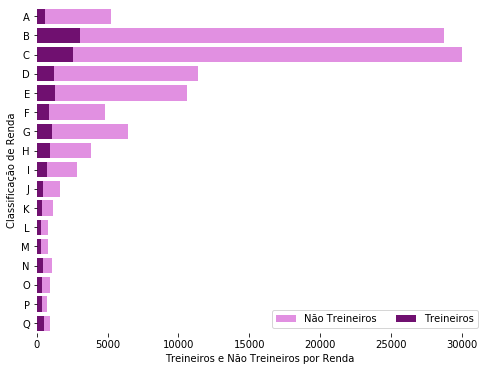

In [59]:
treineiros = dados.query("IN_TREINEIRO == 1")["Q006"].value_counts().sort_index()
nao_treineiros = dados.query("IN_TREINEIRO == 0")["Q006"].value_counts().sort_index()
renda = dados["Q006"].unique()
renda.sort()

f, ax = plt.subplots(figsize=(8, 6))

sns.set_color_codes("pastel")
sns.barplot(x=nao_treineiros, y=renda,
            label="Não Treineiros", color="violet")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x=treineiros, y=renda,
            label="Treineiros", color="purple")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="Classificação de Renda",
       xlabel="Treineiros e Não Treineiros por Renda")
sns.despine(left=True, bottom=True)


Sendo assim, podemos observar que proporcionalmente há mais treineiros em classes altas do que nãs classes mais baixas.


<h2> Desafio 7 </h2>
<p>Fazer o mesmo Boxplot olhando a questão 25

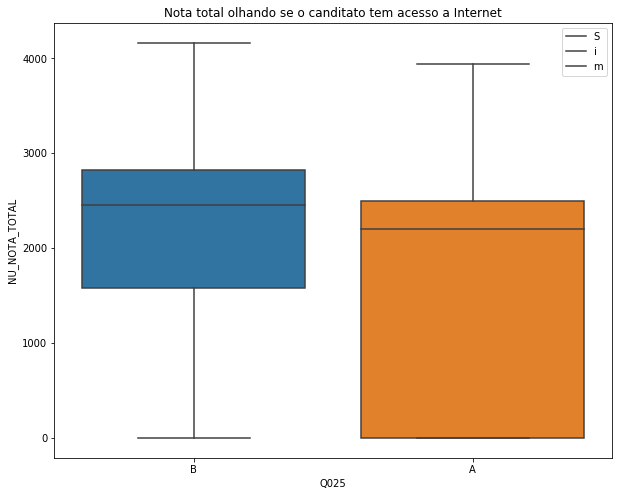

In [64]:
plt.figure(figsize = (10,8))
sns.boxplot(x = "Q025", y = "NU_NOTA_TOTAL", data = dados)
plt.title("Nota total olhando se o canditato tem acesso a Internet")

Dicionário
<p>A - Não tem acesso a internet em casa</p>
<p>B - Tem acesso a internet em casa</p>